## KNN Approach



### Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result

2024-03-20 20:37:00.715364: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-20 20:37:00.740298: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 20:37:00.740317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 20:37:00.740916: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-20 20:37:00.745393: I tensorflow/core/platform/cpu_feature_guar

In [2]:
## adapt this directory to your needs
# TODO-> change path to be dynamic 
base_dir = '/home/bac/activity_prediction/implementation/'
data_dir = base_dir + 'data/'

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [3]:
nn_data_raw = pd.read_csv(data_dir+"MOAB/MOAB.csv")

nn_data_raw

,INDEX,NAME,Salt_Bridge:GLU84B,Hydrophobic_Interaction:GLU84B,Halogen_Bond:GLN206B,Hydrophobic_Interaction:LEU328B,Water_Bridge:THR201B,Halogen_Bond:SER200B,Hydrophobic_Interaction:TYR435A,Hydrogen_Bond:PRO102B,...,Pi-Stacking:PHE168B,Pi-Stacking:TYR326B,Hydrogen_Bond:ASN203B,Hydrophobic_Interaction:GLN206A,Hydrophobic_Interaction:THR201B,Hydrophobic_Interaction:THR202B,Water_Bridge:GLU84B,Hydrophobic_Interaction:PRO104B,Hydrophobic_Interaction:PHE103B,LABEL
0,1,CHEMBL583128|actives_final|sdf|78,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,2,0,0,active
1,2,CHEMBL583128|actives_final|sdf|79,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,2,0,0,active
2,3,ZINC32575615|decoys_final|sdf|262,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,2,0,0,inactive
3,4,CHEMBL45069|actives_final|sdf|163,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,active
4,5,ZINC36683565|decoys_final|sdf|17,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,367,CHEMBL174289|actives_final|sdf|17,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,active
367,368,CHEMBL552680|actives_final|sdf|91,0,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,active
368,369,CHEMBL522271|actives_final|sdf|2,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,active
369,370,CHEMBL26138|actives_final|sdf|107,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,active


In [4]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 300       
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 360 (1.41 KB)
Trainable params: 360 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-03-20 20:37:02.617772: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 20:37:02.638088: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 20:37:02.638136: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 20:37:02.641466: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 20:37:02.641511: I external/local_xla/xla/stream_executor

Epoch 1/150


2024-03-20 20:37:03.717744: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-20 20:37:04.178577: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f1fa48e7440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-20 20:37:04.178610: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-03-20 20:37:04.182868: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-20 20:37:04.194345: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1710963424.254561   28572 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 - 1s - loss: 2.5524 - accuracy: 0.0676 - val_loss: 2.4970 - val_accuracy: 0.0000e+00 - 1s/epoch - 108ms/step
Epoch 2/150
13/13 - 0s - loss: 2.3844 - accuracy: 0.1594 - val_loss: 2.3946 - val_accuracy: 0.1154 - 62ms/epoch - 5ms/step
Epoch 3/150
13/13 - 0s - loss: 2.3236 - accuracy: 0.2512 - val_loss: 2.3290 - val_accuracy: 0.2308 - 64ms/epoch - 5ms/step
Epoch 4/150
13/13 - 0s - loss: 2.2798 - accuracy: 0.3961 - val_loss: 2.2803 - val_accuracy: 0.3077 - 64ms/epoch - 5ms/step
Epoch 5/150
13/13 - 0s - loss: 2.2380 - accuracy: 0.4783 - val_loss: 2.2406 - val_accuracy: 0.3846 - 57ms/epoch - 4ms/step
Epoch 6/150
13/13 - 0s - loss: 2.2064 - accuracy: 0.5314 - val_loss: 2.2115 - val_accuracy: 0.5000 - 58ms/epoch - 4ms/step
Epoch 7/150
13/13 - 0s - loss: 2.1790 - accuracy: 0.5749 - val_loss: 2.1873 - val_accuracy: 0.5192 - 56ms/epoch - 4ms/step
Epoch 8/150
13/13 - 0s - loss: 2.1641 - accuracy: 0.5652 - val_loss: 2.1640 - val_accuracy: 0.5192 - 55ms/epoch - 4ms/step
Epoch 9/150
13/13 - 0s -

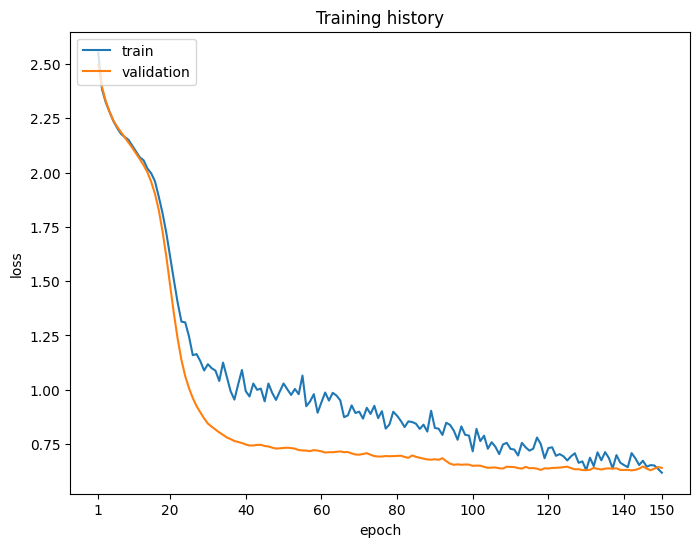

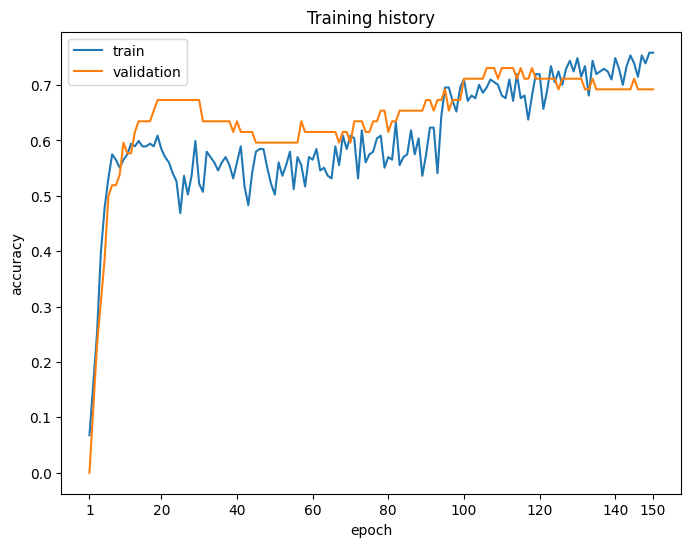

In [7]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

Evaluate Testdata using model

In [8]:
pred = model.predict(X_test)

evaluate_classification_result(y_test, pred, classes=nn_data["target_names"])


4/4 [==============================] - 0s 12ms/step
[[55 17]
 [20 20]]


Class inactive:
    Sensitivity (TPR):  76.389% (55 of 72)
    Specificity (TNR):  50.000% (20 of 40)
    Precision:          73.333% (55 of 75)
    Neg. pred. value:   54.054% (20 of 37)
Class active:
    Sensitivity (TPR):  50.000% (20 of 40)
    Specificity (TNR):  76.389% (55 of 72)
    Precision:          54.054% (20 of 37)
    Neg. pred. value:   73.333% (55 of 75)

Overall accuracy:   66.964% (75 of 112)
Balanced accuracy:  63.194%


array([[55, 17],
       [20, 20]])